<a href="https://colab.research.google.com/github/Raph-09/dversarial_Machine_learning_Framework_for_Enhancing_the_Robustness_of_IDS_against_Evasion_Attacks./blob/main/Adversarial_Machine_learning_Framework_for_Enhancing_the_Robustness_of_IDS_against_Evasion_Attacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Title:  Design and Implementation of Adversarial Machine Learning Framework for Enhancing the Robustness of Intrusion Detection System Against Evasion Attacks**

This experiment was performed to determine the effectiveness of the proposed defence technique against evasion attacks. The IDS model was built using the CICIDS 2017 dataset found on open-source platforms like Kaggle.com. This dataset is chosen because it is used extensively by several researchers for conducting similar research (Usama et al. 2017; Haroon et al. 2022). The dataset was collected using the Python programming language and downloaded into a notebook environment for processing and analysis. After the dataset was prepared, it was used to train a decision tree algorithm to develop an IDS for detecting network intrusion. Three Different attacks were used to test the vulnerability and robustness of the trained decision tree model, of which the performance deteriorated greatly. The proposed defence of adversarial training with an ensemble classifier was put to the test by training the Adaboost, an ensembled technique, on the generated perturbated examples, and the model recorded improved performance on both seen and unseen perturbations.



**Sections Covered in this project are:**


1. Data Exploration




2. Data Preparation




4. IDS Model Developemnt



5. Attacking the IDS Model


6. Defence Strategy for the IDS Model

## **Data Exploration**

This phase entails exploring the data to identify data quality issues. The following are covered in this section.


1. import relevant libraries for the work

2. Inspecting first 5 and  last 5 rows

3. Check for data types of features

4. Check for missing values

5. Check for imbalance of the target variable/feature

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



**Mount drive to the Notebook to make it possible to utilized the drive for saving the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option("display.max_rows",None,"display.max_columns",None)

Read data into pandas dataframe called "df"

In [ ]:
df = pd.read_csv("combine.csv")

<ipython-input-4-6c22493f5f49>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("combine.csv")


Check first five rows

In [ ]:
df.head()

Destination Port   Flow Duration   Total Fwd Packets  \
0             54865             3.0                 2.0   
1             55054           109.0                 1.0   
2             55055            52.0                 1.0   
3             46236            34.0                 1.0   
4             54863             3.0                 2.0   

    Total Backward Packets  Total Length of Fwd Packets  \
0                      0.0                         12.0   
1                      1.0                          6.0   
2                      1.0                          6.0   
3                      1.0                          6.0   
4                      0.0                         12.0   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                           0.0                     6.0   
1                           6.0                     6.0   
2                           6.0                     6.0   
3                           6.0                     6.0   
4                           0.0                     6.0   

    Fwd Packet Length Min   Fwd Packet Length Mean   Fwd Packet Length Std  \
0                     6.0                      6.0                     0.0   
1                     6.0                      6.0                     0.0   
2                     6.0                      6.0                     0.0   
3                     6.0                      6.0                     0.0   
4                     6.0                      6.0                     0.0   

   Bwd Packet Length Max   Bwd Packet Length Min   Bwd Packet Length Mean  \
0                    0.0                     0.0                      0.0   
1                    6.0                     6.0                      6.0   
2                    6.0                     6.0                      6.0   
3                    6.0                     6.0                      6.0   
4                    0.0                     0.0                      0.0   

    Bwd Packet Length Std  Flow Bytes/s   Flow Packets/s   Flow IAT Mean  \
0                     0.0  4.000000e+06     666666.66670             3.0   
1                     0.0  1.100917e+05      18348.62385           109.0   
2                     0.0  2.307692e+05      38461.53846            52.0   
3                     0.0  3.529412e+05      58823.52941            34.0   
4                     0.0  4.000000e+06     666666.66670             3.0   

    Flow IAT Std   Flow IAT Max   Flow IAT Min  Fwd IAT Total   Fwd IAT Mean  \
0            0.0            3.0            3.0            3.0            3.0   
1            0.0          109.0          109.0            0.0            0.0   
2            0.0           52.0           52.0            0.0            0.0   
3            0.0           34.0           34.0            0.0            0.0   
4            0.0            3.0            3.0            3.0            3.0   

    Fwd IAT Std   Fwd IAT Max   Fwd IAT Min  Bwd IAT Total   Bwd IAT Mean  \
0           0.0           3.0           3.0            0.0            0.0   
1           0.0           0.0           0.0            0.0            0.0   
2           0.0           0.0           0.0            0.0            0.0   
3           0.0           0.0           0.0            0.0            0.0   
4           0.0           3.0           3.0            0.0            0.0   

    Bwd IAT Std   Bwd IAT Max   Bwd IAT Min  Fwd PSH Flags   Bwd PSH Flags  \
0           0.0           0.0           0.0            0.0             0.0   
1           0.0           0.0           0.0            0.0             0.0   
2           0.0           0.0           0.0            0.0             0.0   
3           0.0           0.0           0.0            0.0             0.0   
4           0.0           0.0           0.0            0.0             0.0   

    Fwd URG Flags   Bwd URG Flags   Fwd Header Length   Bwd Header Length  \
0             0.0             0.0                40.0      

Check the number of columns and rows

In [ ]:
df.shape

(2214469, 79)

there are 2214469 rows and 79 columns(features)


Inspect the datatypes of each of the variables

In [ ]:
df.dtypes

Destination Port                object
 Flow Duration                  float64
 Total Fwd Packets              float64
 Total Backward Packets         float64
Total Length of Fwd Packets     float64
 Total Length of Bwd Packets    float64
 Fwd Packet Length Max          float64
 Fwd Packet Length Min          float64
 Fwd Packet Length Mean         float64
 Fwd Packet Length Std          float64
Bwd Packet Length Max           float64
 Bwd Packet Length Min          float64
 Bwd Packet Length Mean         float64
 Bwd Packet Length Std          float64
Flow Bytes/s                    float64
 Flow Packets/s                 float64
 Flow IAT Mean                  float64
 Flow IAT Std                   float64
 Flow IAT Max                   float64
 Flow IAT Min                   float64
Fwd IAT Total                   float64
 Fwd IAT Mean                   float64
 Fwd IAT Std                    float64
 Fwd IAT Max                    float64
 Fwd IAT Min                    float64
Bwd IAT Total                   float64
 Bwd IAT Mean                   float64
 Bwd IAT Std                    float64
 Bwd IAT Max                    float64
 Bwd IAT Min                    float64
Fwd PSH Flags                   float64
 Bwd PSH Flags                  float64
 Fwd URG Flags                  float64
 Bwd URG Flags                  float64
 Fwd Header Length              float64
 Bwd Header Length              float64
Fwd Packets/s                   float64
 Bwd Packets/s                  float64
 Min Packet Length              float64
 Max Packet Length              float64
 Packet Length Mean             float64
 Packet Length Std              float64
 Packet Length Variance         float64
FIN Flag Count                  float64
 SYN Flag Count                 float64
 RST Flag Count                 float64
 PSH Flag Count                 float64
 ACK Flag Count                 float64
 URG Flag Count                 float64
 CWE Flag Count                 float64
 ECE Flag Count                 float64
 Down/Up Ratio                  float64
 Average Packet Size            float64
 Avg Fwd Segment Size           float64
 Avg Bwd Segment Size           float64
 Fwd Header Length.1            float64
Fwd Avg Bytes/Bulk              float64
 Fwd Avg Packets/Bulk           float64
 Fwd Avg Bulk Rate              float64
 Bwd Avg Bytes/Bulk             float64
 Bwd Avg Packets/Bulk           float64
Bwd Avg Bulk Rate               float64
Subflow Fwd Packets             float64
 Subflow Fwd Bytes              float64
 Subflow Bwd Packets            float64
 Subflow Bwd Bytes              float64
Init_Win_bytes_forward          float64
 Init_Win_bytes_backward        float64
 act_data_pkt_fwd               float64
 min_seg_size_forward           float64
Active Mean                     float64
 Active Std                     float64
 Active Max                     float64
 Active Min                     float64
Idle Mean                       float64
 Idle Std                       float64
 Idle Max                       float64
 Idle Min                       float64
 Label                           object
dtype: object

This dataset has 2,214,469 observations and 79 variables, of which only two are categorical variables—“Destination Port” and “Label.”

Unique values  within " Destination Port"

In [ ]:
df[" Destination Port"].value_counts()

Destination Port
53       688871
80       552191
443      372431
123       14988
22         7873
137        5315
389        4597
21         4076
88         3826
8080       2743
465        2718
139        2180
3268       1812
53         1616
445        1609
0          1239
135        1141
138        1118
49666       526
5353        484
444         361
1042        348
1041        344
1900        343
1           341
1026        341
1037        339
1124        313
8081        274
1434        272
42          269
5355        255
50636       254
50000       248
49400       246
50300       246
50002       243
50003       243
55056       242
49999       242
48080       242
49175       241
52822       241
52673       240
50500       240
55600       238
57294       238
51103       238
44176       238
54045       237
52848       237
50006       237
54328       237
56737       237
8000        236
51493       236
50001       236
50800       236
49176       235
49158       235
52869       235
55055       235
49157       235
65000       234
58080       233
60020       233
1217        233
32778       233
49167       233
49155       233
63331       233
57797       232
55555       232
6059        232
49160       232
1080        232
5000        232
49163       232
56738       232
64623       232
2001        232
1761        231
7800        231
35500       231
49156       231
65389       231
2382        231
5925        231
33354       231
3766        231
6547        231
1839        231
65129       231
1147        231
1111        231
32768       231
2222        231
2811        231
25735       231
2910        231
1309        231
5087        231
10004       230
2099        230
5560        230
1301        230
2702        230
1947        230
1098        230
32772       230
2366        230
1213        230
1310        230
3323        230
7019        230
1524        230
1521        230
2040        230
34572       230
2045        230
1244        230
5357        230
1594        229
32776       229
49152       229
6901        229
3659        229
2557        229
1086        229
32779       229
2121        229
2170        229
1580        229
32783       229
2393        229
5904        229
1031        229
32780       229
61532       229
7200        229
2725        229
5850        229
2869        229
1087        229
9999        229
6129        229
4321        229
32775       229
7106        229
32784       229
3995        229
1060        229
2251        229
1121        229
7025        229
32774       229
3077        229
2383        229
1199        229
2381        229
5030        229
2288        229
5822        229
5200        229
4900        229
1201        229
1914        229
8651        229
1061        228
10243       228
6123        228
2107        228
16993       228
1658        228
2601        228
10082       228
843         228
7920        228
3551        228
2043        228
8090        228
2323        228
6003        228
5214        228
8082        228
5550        228
1130        228
2033        228
3690        228
1132        228
8008        228
3369        228
1186        228
1046        228
4000        228
1085        228
5815        228
99          228
5859        228
6112        228
13783       228
1311        228
1027        228
37          228
1461        228
9101        228
1334        228
9000        228
1025        228
6101        228
1164        228
3703        228
2522        228
49165       228
5190        228
2525        228
7777        228
6502        228
10012       228
9878        228
9100        228
64680       228
5061        228
1443        228
9110        228
1175        228
1097        228
1034        228
1030        228
1174        228
38292       228
3517        228
49671       228
1501        227
3301        227
8010        227
555         227
1088        227
7676        227
9010        227
19101       227
7443        227
1122        227
3300        227
6346        227
5001        227
2106        227
2005        227
8180        227

checking for the presence of mssing values

In [ ]:
df.isnull().sum()

Destination Port                  0
 Flow Duration                     1
 Total Fwd Packets                 1
 Total Backward Packets            1
Total Length of Fwd Packets        1
 Total Length of Bwd Packets       1
 Fwd Packet Length Max             1
 Fwd Packet Length Min             1
 Fwd Packet Length Mean            1
 Fwd Packet Length Std             1
Bwd Packet Length Max              1
 Bwd Packet Length Min             1
 Bwd Packet Length Mean            1
 Bwd Packet Length Std             1
Flow Bytes/s                    1138
 Flow Packets/s                    1
 Flow IAT Mean                     1
 Flow IAT Std                      1
 Flow IAT Max                      1
 Flow IAT Min                      1
Fwd IAT Total                      1
 Fwd IAT Mean                      1
 Fwd IAT Std                       1
 Fwd IAT Max                       1
 Fwd IAT Min                       1
Bwd IAT Total                      1
 Bwd IAT Mean                      1
 Bwd IAT Std                       1
 Bwd IAT Max                       1
 Bwd IAT Min                       1
Fwd PSH Flags                      1
 Bwd PSH Flags                     1
 Fwd URG Flags                     1
 Bwd URG Flags                     1
 Fwd Header Length                 1
 Bwd Header Length                 1
Fwd Packets/s                      1
 Bwd Packets/s                     1
 Min Packet Length                 1
 Max Packet Length                 1
 Packet Length Mean                1
 Packet Length Std                 1
 Packet Length Variance            1
FIN Flag Count                     1
 SYN Flag Count                    1
 RST Flag Count                    1
 PSH Flag Count                    1
 ACK Flag Count                    1
 URG Flag Count                    1
 CWE Flag Count                    1
 ECE Flag Count                    1
 Down/Up Ratio                     1
 Average Packet Size               1
 Avg Fwd Segment Size              1
 Avg Bwd Segment Size              1
 Fwd Header Length.1               1
Fwd Avg Bytes/Bulk                 1
 Fwd Avg Packets/Bulk              1
 Fwd Avg Bulk Rate                 1
 Bwd Avg Bytes/Bulk                1
 Bwd Avg Packets/Bulk              1
Bwd Avg Bulk Rate                  1
Subflow Fwd Packets                1
 Subflow Fwd Bytes                 1
 Subflow Bwd Packets               1
 Subflow Bwd Bytes                 1
Init_Win_bytes_forward             1
 Init_Win_bytes_backward           1
 act_data_pkt_fwd                  1
 min_seg_size_forward              1
Active Mean                        1
 Active Std                        1
 Active Max                        1
 Active Min                        1
Idle Mean                          1
 Idle Std                          1
 Idle Max                          1
 Idle Min                          1
 Label                             1
dtype: int64

There were missing values in almost all the variables and Flow Bytes/s has the hghest number of missng values of	1138

Missing values by percentage

In [ ]:
df.isnull().mean()

Destination Port               0.000000e+00
 Flow Duration                  4.515755e-07
 Total Fwd Packets              4.515755e-07
 Total Backward Packets         4.515755e-07
Total Length of Fwd Packets     4.515755e-07
 Total Length of Bwd Packets    4.515755e-07
 Fwd Packet Length Max          4.515755e-07
 Fwd Packet Length Min          4.515755e-07
 Fwd Packet Length Mean         4.515755e-07
 Fwd Packet Length Std          4.515755e-07
Bwd Packet Length Max           4.515755e-07
 Bwd Packet Length Min          4.515755e-07
 Bwd Packet Length Mean         4.515755e-07
 Bwd Packet Length Std          4.515755e-07
Flow Bytes/s                    5.138929e-04
 Flow Packets/s                 4.515755e-07
 Flow IAT Mean                  4.515755e-07
 Flow IAT Std                   4.515755e-07
 Flow IAT Max                   4.515755e-07
 Flow IAT Min                   4.515755e-07
Fwd IAT Total                   4.515755e-07
 Fwd IAT Mean                   4.515755e-07
 Fwd IAT Std                    4.515755e-07
 Fwd IAT Max                    4.515755e-07
 Fwd IAT Min                    4.515755e-07
Bwd IAT Total                   4.515755e-07
 Bwd IAT Mean                   4.515755e-07
 Bwd IAT Std                    4.515755e-07
 Bwd IAT Max                    4.515755e-07
 Bwd IAT Min                    4.515755e-07
Fwd PSH Flags                   4.515755e-07
 Bwd PSH Flags                  4.515755e-07
 Fwd URG Flags                  4.515755e-07
 Bwd URG Flags                  4.515755e-07
 Fwd Header Length              4.515755e-07
 Bwd Header Length              4.515755e-07
Fwd Packets/s                   4.515755e-07
 Bwd Packets/s                  4.515755e-07
 Min Packet Length              4.515755e-07
 Max Packet Length              4.515755e-07
 Packet Length Mean             4.515755e-07
 Packet Length Std              4.515755e-07
 Packet Length Variance         4.515755e-07
FIN Flag Count                  4.515755e-07
 SYN Flag Count                 4.515755e-07
 RST Flag Count                 4.515755e-07
 PSH Flag Count                 4.515755e-07
 ACK Flag Count                 4.515755e-07
 URG Flag Count                 4.515755e-07
 CWE Flag Count                 4.515755e-07
 ECE Flag Count                 4.515755e-07
 Down/Up Ratio                  4.515755e-07
 Average Packet Size            4.515755e-07
 Avg Fwd Segment Size           4.515755e-07
 Avg Bwd Segment Size           4.515755e-07
 Fwd Header Length.1            4.515755e-07
Fwd Avg Bytes/Bulk              4.515755e-07
 Fwd Avg Packets/Bulk           4.515755e-07
 Fwd Avg Bulk Rate              4.515755e-07
 Bwd Avg Bytes/Bulk             4.515755e-07
 Bwd Avg Packets/Bulk           4.515755e-07
Bwd Avg Bulk Rate               4.515755e-07
Subflow Fwd Packets             4.515755e-07
 Subflow Fwd Bytes              4.515755e-07
 Subflow Bwd Packets            4.515755e-07
 Subflow Bwd Bytes              4.515755e-07
Init_Win_bytes_forward          4.515755e-07
 Init_Win_bytes_backward        4.515755e-07
 act_data_pkt_fwd               4.515755e-07
 min_seg_size_forward           4.515755e-07
Active Mean                     4.515755e-07
 Active Std                     4.515755e-07
 Active Max                     4.515755e-07
 Active Min                     4.515755e-07
Idle Mean                       4.515755e-07
 Idle Std                       4.515755e-07
 Idle Max                       4.515755e-07
 Idle Min                       4.515755e-07
 Label                          4.515755e-07
dtype: float64

Check for imbalance of the Target variable

In [ ]:
df[' Label'].value_counts()

Label
BENIGN              1672837
DoS Hulk             231073
PortScan             158930
DDoS                 128027
DoS GoldenEye         10293
DoS slowloris          5796
DoS Slowhttptest       5499
Bot                    1966
Infiltration             36
Heartbleed               11
Name: count, dtype: int64

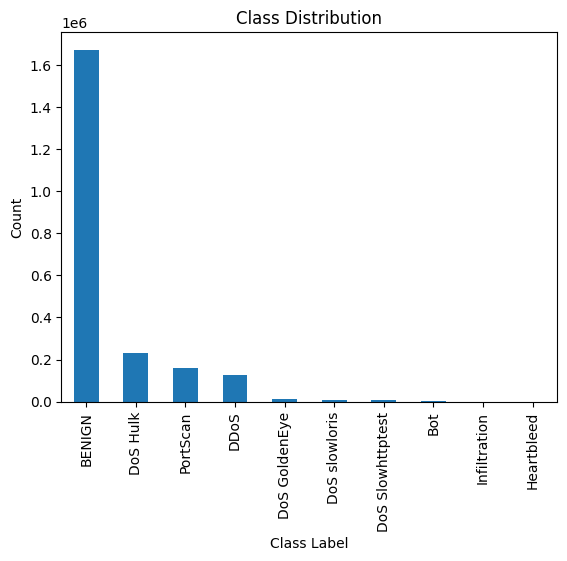

In [ ]:
import matplotlib.pyplot as plt
df[' Label'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

There was an imbalance in the dataset with the attacks having only 24% of the dataset while the negative class (benign) having 76% of the dataset. This will lead to the algorithm becoming biased to the overrepresented class and will result in high false positives and negatives. This issue was handled using an under-sampling technique where the majority class was reduced to be the same size as the underrepresented class in the data preparation phase.

Convert the Target variable into binomial variable with two values: Benign and Attack. Attack is the combination of all attacks present within the dataset.

In [ ]:
# List of attack labels to combine
attack_labels = ["DoS Hulk", "PortScan", "DDoS", "DoS GoldenEye", "DoS slowloris",
                 "DoS Slowhttptest", "Bot", "Infiltration", "Heartbleed"]

# Replace specified attack labels with "Attack"
df.loc[df[' Label'].isin(attack_labels), ' Label'] = "Attack"

In [ ]:
# Calculate the percentage of each label
label_counts = df[' Label'].value_counts(normalize=True) * 100

# Print the percentages
label_counts

Label
BENIGN    75.541259
Attack    24.458741
Name: proportion, dtype: float64

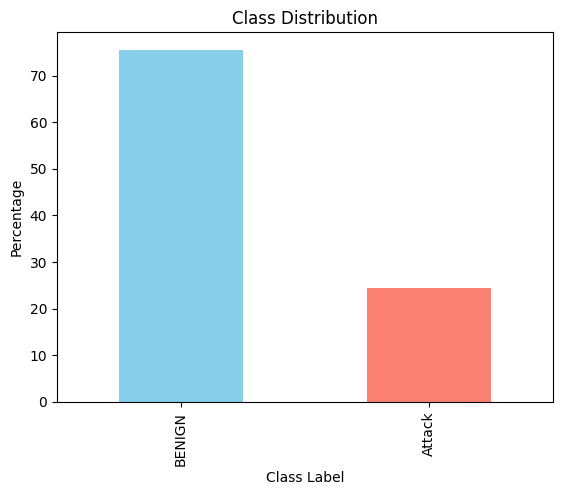

In [ ]:

# Calculate the percentage of each label
label_counts = df[' Label'].value_counts(normalize=True) * 100

# Create the bar plot with different colors
label_counts.plot(kind='bar', color=['skyblue', 'salmon'])  # Example colors

plt.title('Class Distribution')
plt.xlabel('Class Label')
plt.ylabel('Percentage') # Changed to percentage
plt.show()

There is a clear case of imbalance in the dataset with 24.46% of the dataset representing Attack while the remaining 75.54% represent Normal network.The data will have to be balanced to avoid the model not learning much from the under-represented class. This will be done using udersampling method.

## **Data Preparation**

Handling Rare lables:
Rare labels are values within categorical variables with very low occurrence/frequency within the dataset (Georgiannacambel 2020). These values usually cause dimensional problems during splitting; they will be present in the training dataset but not in the testing dataset and vice versa. In this dataset, rare labels were present in the “Destination Port” and “Label” variables.

There  were rare labels in the "' Destination Port" variable. The top 5 were retained while the rest were represented as others.

In [ ]:
# Group by 'Destination Port' and get the top 5 ports
top_ports = df[' Destination Port'].value_counts().nlargest(5).index


In [ ]:
top_ports

Index([53, 80, 443, 123, 22], dtype='int64', name=' Destination Port')

In [ ]:
# Create a new column 'Destination Port Grouped'
df['Destination Port Grouped'] = df[' Destination Port'].apply(lambda x: x if x in top_ports else 'Others')

In [ ]:
df.head()

Destination Port   Flow Duration   Total Fwd Packets  \
0             54865             3.0                 2.0   
1             55054           109.0                 1.0   
2             55055            52.0                 1.0   
3             46236            34.0                 1.0   
4             54863             3.0                 2.0   

    Total Backward Packets  Total Length of Fwd Packets  \
0                      0.0                         12.0   
1                      1.0                          6.0   
2                      1.0                          6.0   
3                      1.0                          6.0   
4                      0.0                         12.0   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                           0.0                     6.0   
1                           6.0                     6.0   
2                           6.0                     6.0   
3                           6.0                     6.0   
4                           0.0                     6.0   

    Fwd Packet Length Min   Fwd Packet Length Mean   Fwd Packet Length Std  \
0                     6.0                      6.0                     0.0   
1                     6.0                      6.0                     0.0   
2                     6.0                      6.0                     0.0   
3                     6.0                      6.0                     0.0   
4                     6.0                      6.0                     0.0   

   Bwd Packet Length Max   Bwd Packet Length Min   Bwd Packet Length Mean  \
0                    0.0                     0.0                      0.0   
1                    6.0                     6.0                      6.0   
2                    6.0                     6.0                      6.0   
3                    6.0                     6.0                      6.0   
4                    0.0                     0.0                      0.0   

    Bwd Packet Length Std  Flow Bytes/s   Flow Packets/s   Flow IAT Mean  \
0                     0.0  4.000000e+06     666666.66670             3.0   
1                     0.0  1.100917e+05      18348.62385           109.0   
2                     0.0  2.307692e+05      38461.53846            52.0   
3                     0.0  3.529412e+05      58823.52941            34.0   
4                     0.0  4.000000e+06     666666.66670             3.0   

    Flow IAT Std   Flow IAT Max   Flow IAT Min  Fwd IAT Total   Fwd IAT Mean  \
0            0.0            3.0            3.0            3.0            3.0   
1            0.0          109.0          109.0            0.0            0.0   
2            0.0           52.0           52.0            0.0            0.0   
3            0.0           34.0           34.0            0.0            0.0   
4            0.0            3.0            3.0            3.0            3.0   

    Fwd IAT Std   Fwd IAT Max   Fwd IAT Min  Bwd IAT Total   Bwd IAT Mean  \
0           0.0           3.0           3.0            0.0            0.0   
1           0.0           0.0           0.0            0.0            0.0   
2           0.0           0.0           0.0            0.0            0.0   
3           0.0           0.0           0.0            0.0            0.0   
4           0.0           3.0           3.0            0.0            0.0   

    Bwd IAT Std   Bwd IAT Max   Bwd IAT Min  Fwd PSH Flags   Bwd PSH Flags  \
0           0.0           0.0           0.0            0.0             0.0   
1           0.0           0.0           0.0            0.0             0.0   
2           0.0           0.0           0.0            0.0             0.0   
3           0.0           0.0           0.0            0.0             0.0   
4           0.0           0.0           0.0            0.0             0.0   

    Fwd URG Flags   Bwd URG Flags   Fwd Header Length   Bwd Header Length  \
0             0.0             0.0                40.0      

convert the process

In [ ]:
df["Destination Port Grouped"].unique()

array(['Others', 53, 443, 80, 22, 123], dtype=object)

convert ' Destination Port' to string

In [ ]:
df['Destination Port Grouped'] = df['Destination Port Grouped'].astype('string')

Convert ' Destination Port Grouped' to numerical vectors. This was done using Ordinal encoding as seen below:

In [ ]:
# Create a mapping dictionary for ordinal encoding
port_mapping = {port: i for i, port in enumerate(df['Destination Port Grouped'].unique())}

# Apply ordinal encoding to the 'Destination Port Grouped' column
df['Destination Port Grouped Encoded'] = df['Destination Port Grouped'].map(port_mapping)

### **Handling Missing Values**

In [ ]:
df = df.dropna()

In [ ]:
# df[' Label'].value_counts()

**Converting the Labels to numerical representation**

This is because machine learning models do not have ability to process text data

In [ ]:
# Create a mapping dictionary for the target variable
label_mapping = {"BENIGN": 0, "Attack": 1}

# Apply the mapping to the 'Label' column
df[' Label'] = df[' Label'].map(label_mapping)

df[' Label'].value_counts()

Label
0    1672649
1     540682
Name: count, dtype: int64

### **Fixing Imbalance Problem**

The Under-Sampling technique was used to handle the imbalance in the target class

In [ ]:
# Separate majority and minority classes
df_majority = df[df[' Label'] == 0]
df_minority = df[df[' Label'] == 1]

# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                 random_state=123) # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

df  = df_downsampled

# Display new class counts
df_downsampled[' Label'].value_counts()

Label
0    540682
1    540682
Name: count, dtype: int64

Drop redundant variable

In [ ]:
df = df.drop([' Destination Port','Destination Port Grouped'], axis=1)

drop null values

In [ ]:
# df = df.dropna()

In [ ]:
df.head()

Flow Duration   Total Fwd Packets   Total Backward Packets  \
41298           29316.0                 1.0                      1.0   
533073         113474.0                 1.0                      1.0   
1326127         19916.0                 1.0                      1.0   
925271              5.0                 3.0                      0.0   
505548            159.0                 2.0                      2.0   

         Total Length of Fwd Packets   Total Length of Bwd Packets  \
41298                           71.0                         153.0   
533073                          54.0                          91.0   
1326127                          0.0                           0.0   
925271                          31.0                           0.0   
505548                          98.0                         154.0   

          Fwd Packet Length Max   Fwd Packet Length Min  \
41298                      71.0                    71.0   
533073                     54.0                    54.0   
1326127                     0.0                     0.0   
925271                     31.0                     0.0   
505548                     49.0                    49.0   

          Fwd Packet Length Mean   Fwd Packet Length Std  \
41298                  71.000000                0.000000   
533073                 54.000000                0.000000   
1326127                 0.000000                0.000000   
925271                 10.333333               17.897858   
505548                 49.000000                0.000000   

         Bwd Packet Length Max   Bwd Packet Length Min  \
41298                    153.0                   153.0   
533073                    91.0                    91.0   
1326127                    0.0                     0.0   
925271                     0.0                     0.0   
505548                    77.0                    77.0   

          Bwd Packet Length Mean   Bwd Packet Length Std  Flow Bytes/s  \
41298                      153.0                     0.0  7.640879e+03   
533073                      91.0                     0.0  1.277826e+03   
1326127                      0.0                     0.0  0.000000e+00   
925271                       0.0                     0.0  6.200000e+06   
505548                      77.0                     0.0  1.584906e+06   

          Flow Packets/s   Flow IAT Mean   Flow IAT Std   Flow IAT Max  \
41298          68.222131         29316.0        0.00000        29316.0   
533073         17.625183        113474.0        0.00000       113474.0   
1326127       100.421771         19916.0        0.00000        19916.0   
925271     600000.000000             2.5        2.12132            4.0   
505548      25157.232700            53.0       86.60254          153.0   

          Flow IAT Min  Fwd IAT Total   Fwd IAT Mean   Fwd IAT Std  \
41298          29316.0            0.0            0.0       0.00000   
533073        113474.0            0.0            0.0       0.00000   
1326127        19916.0            0.0            0.0       0.00000   
925271             1.0            5.0            2.5       2.12132   
505548             3.0            3.0            3.0       0.00000   

          Fwd IAT Max   Fwd IAT Min  Bwd IAT Total   Bwd IAT Mean  \
41298             0.0           0.0            0.0            0.0   
533073            0.0           0.0            0.0            0.0   
1326127           0.0           0.0            0.0            0.0   
925271            4.0           1.0            0.0            0.0   
505548            3.0           3.0            3.0            3.0   

          Bwd IAT Std   Bwd IAT Max   Bwd IAT Min  Fwd PSH Flags  \
41298             0.0           0.0           0.0            0.0   
533073            0.0           0.0           0.0            0.0   
1326127           0.0           0.0           0.0            0.0   
925271            0.0           0.0           0.0            0.0   
505548            0.0    

confirm the removal of null values

In [ ]:
df.isnull().sum()

Flow Duration                      0
 Total Fwd Packets                  0
 Total Backward Packets             0
Total Length of Fwd Packets         0
 Total Length of Bwd Packets        0
 Fwd Packet Length Max              0
 Fwd Packet Length Min              0
 Fwd Packet Length Mean             0
 Fwd Packet Length Std              0
Bwd Packet Length Max               0
 Bwd Packet Length Min              0
 Bwd Packet Length Mean             0
 Bwd Packet Length Std              0
Flow Bytes/s                        0
 Flow Packets/s                     0
 Flow IAT Mean                      0
 Flow IAT Std                       0
 Flow IAT Max                       0
 Flow IAT Min                       0
Fwd IAT Total                       0
 Fwd IAT Mean                       0
 Fwd IAT Std                        0
 Fwd IAT Max                        0
 Fwd IAT Min                        0
Bwd IAT Total                       0
 Bwd IAT Mean                       0
 Bwd IAT Std                        0
 Bwd IAT Max                        0
 Bwd IAT Min                        0
Fwd PSH Flags                       0
 Bwd PSH Flags                      0
 Fwd URG Flags                      0
 Bwd URG Flags                      0
 Fwd Header Length                  0
 Bwd Header Length                  0
Fwd Packets/s                       0
 Bwd Packets/s                      0
 Min Packet Length                  0
 Max Packet Length                  0
 Packet Length Mean                 0
 Packet Length Std                  0
 Packet Length Variance             0
FIN Flag Count                      0
 SYN Flag Count                     0
 RST Flag Count                     0
 PSH Flag Count                     0
 ACK Flag Count                     0
 URG Flag Count                     0
 CWE Flag Count                     0
 ECE Flag Count                     0
 Down/Up Ratio                      0
 Average Packet Size                0
 Avg Fwd Segment Size               0
 Avg Bwd Segment Size               0
 Fwd Header Length.1                0
Fwd Avg Bytes/Bulk                  0
 Fwd Avg Packets/Bulk               0
 Fwd Avg Bulk Rate                  0
 Bwd Avg Bytes/Bulk                 0
 Bwd Avg Packets/Bulk               0
Bwd Avg Bulk Rate                   0
Subflow Fwd Packets                 0
 Subflow Fwd Bytes                  0
 Subflow Bwd Packets                0
 Subflow Bwd Bytes                  0
Init_Win_bytes_forward              0
 Init_Win_bytes_backward            0
 act_data_pkt_fwd                   0
 min_seg_size_forward               0
Active Mean                         0
 Active Std                         0
 Active Max                         0
 Active Min                         0
Idle Mean                           0
 Idle Std                           0
 Idle Max                           0
 Idle Min                           0
 Label                              0
Destination Port Grouped Encoded    0
dtype: int64

Remove  " infinity or a value too large for dtype('float64')" form dataset (df)

In [ ]:
# Check for infinity and replace with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
df.dropna(inplace=True)

## **Feature Selection**

Feature selection using selectKbest

In [ ]:
X = df.drop(' Label', axis=1)  # Features
y = df[' Label']  # Target variable

# Apply SelectKBest class to extract top 50 best features
bestfeatures = SelectKBest(score_func=f_classif, k=50)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concatenate dataframes
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  # Naming the dataframe columns

# Print 50 best features
print(featureScores.nlargest(50,'Score'))

                               Specs          Score
12             Bwd Packet Length Std  275302.484999
11            Bwd Packet Length Mean  270168.371111
53              Avg Bwd Segment Size  270168.371111
9              Bwd Packet Length Max  267196.846077
37                 Min Packet Length  250213.009264
40                 Packet Length Std  243938.834579
38                 Max Packet Length  232383.031438
10             Bwd Packet Length Min  224087.437097
39                Packet Length Mean  205131.007090
51               Average Packet Size  199007.497403
41            Packet Length Variance  198099.058246
21                       Fwd IAT Std  181903.224012
75                          Idle Max  170123.266403
22                       Fwd IAT Max  166522.602853
17                      Flow IAT Max  166191.952480
73                         Idle Mean  165190.983409
76                          Idle Min  154476.991110
77  Destination Port Grouped Encoded  146230.776500
16          

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [30 32 55 56 57 58 59 60] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Selecting 19 features with the highest scores

In [ ]:
X = df[
    [
        " Bwd Packet Length Std",
        " Bwd Packet Length Mean",
        " Avg Bwd Segment Size",
        "Bwd Packet Length Max",
        " Packet Length Std",
        " Min Packet Length",
        " Max Packet Length",
        " Bwd Packet Length Min",
        " Packet Length Mean",
        " Average Packet Size",
        " Packet Length Variance",
        " Fwd IAT Std",
        " Idle Max",
        " Fwd IAT Max",
        " Flow IAT Max",
        "Idle Mean",
        " Idle Min",
        "Destination Port Grouped Encoded",
        " Flow IAT Std",
    ]
]

y = df[' Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(864664, 19) (216166, 19) (864664,) (216166,)


**Feature Scalling**

This is done to bring the dataset to the same magnitude to avoid one variable dorminating others.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Ensure the test set is scaled the same way

In [ ]:

# Save y_test to a CSV file
y_test.to_csv('y_test.csv', index=False)

In [ ]:
# Save X_test to a CSV file
pd.DataFrame(X_test).to_csv('X_test.csv', index=False)

# **Model Training and Evaluation - Buiding the IDS (Intrusion Detection System)**

The algorithm used for developing the intrusion detection model is the decision tree algorithm, which trains by creating a tree-like structure and uses it to make predictions (De Ville 2013). The default parameters of the model were used: “criterion” was “gini,”max_depth” was “none,”min_samples_split” was 2, and “class_weight was “none” (this means all features were weighted equally), etc. The random_state was set to 42; this was to ensure reproducibility. This model was trained on the training dataset to learn the innate pattern within the features and was evaluated using the testing set. The following is the breakdown of the model performance.

In [ ]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9969005301481269


Accuracy: 0.9969005301481269
Precision: 0.9966791238067046
Recall: 0.9971218627378396
F1 Score: 0.9969004441154701
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    108110
           1       1.00      1.00      1.00    108056

    accuracy                           1.00    216166
   macro avg       1.00      1.00      1.00    216166
weighted avg       1.00      1.00      1.00    216166



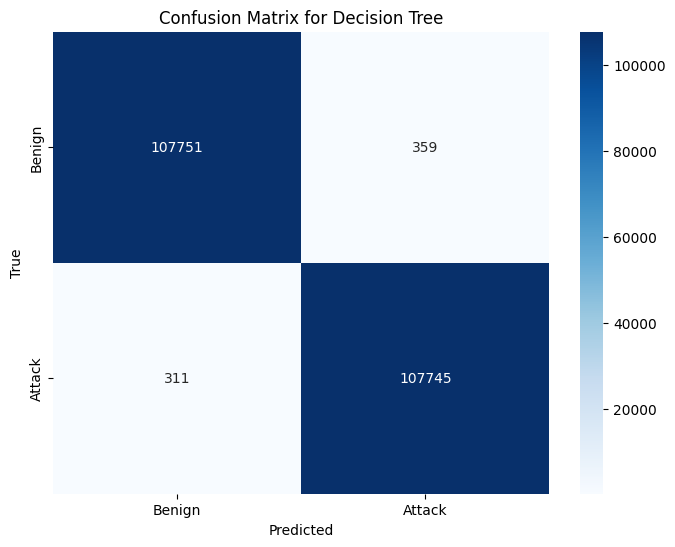

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

print(classification_report(y_test, y_pred))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign", "Attack"], yticklabels=["Benign", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Decision Tree")
plt.show()

# **Adversarial Attacks**

# **FGSM**

The FGSM was used to develop adversarial examples to attack the decision tree model. A function called “fgsm_attack” was created with four parameters: model, data, label, and epsilon. The model stands for the decision tree model built for intrusion detection; the data represent the test dataset, which will be distorted to produce the perturbated examples; the label represents the target class, or “y_test,” and the epsilon stands for the degree of perturbations allowed to be added to the dataset. An epsilon of 0.1 was selected to generate perturbated examples, and these examples were the same size as the original test set. These examples were used to attack the decision tree model, and the following is the performance of the model after the attack.

In [ ]:
epsilon = 0.1

def fgsm_attack(model, data, label, epsilon):#This is FGSM funtion and it takes in four parameters: model representing the decision tree model, data representing the input data, label representing the true label
                                              # and Epsilon which stands for the degree of perturbations
    data = np.array(data, dtype=np.float32)

    initial_pred = model.predict(np.array([data]))[0]  # Get the initial predicition from the model. This will help in the attack process


    if initial_pred == label:  #check if the predictions are same with the true label. If they are same that means the model predicted correctly therefore the model needs to be attacked to make false prediction

        loss = initial_pred



        gradient = np.random.uniform(low=-1, high=1, size=data.shape) #calculate the gradient from the data


        perturbation = epsilon * np.sign(gradient)  # calculate the pertubation using the gradient and epsilon values


        adversarial_data = data + perturbation  #Add the perturbations to the data to create adversarial examples
        adversarial_data = np.clip(adversarial_data, 0, 1) # ensure values are in 0 to 1 range

        return adversarial_data

    return data


# Generate adversarial examples for the entire test set
adversarial_examples = []
for i in range(len(X_test)):
  adversarial_ex = fgsm_attack(clf, X_test[i], y_test.iloc[i], epsilon)
  adversarial_examples.append(adversarial_ex)


# Evaluate the model on the adversarial examples
adversarial_predictions = clf.predict(np.array(adversarial_examples))

# Calculate accuracy on the adversarial examples
adversarial_accuracy = accuracy_score(y_test, adversarial_predictions)
print(f"Adversarial Accuracy: {adversarial_accuracy}")

# Compare the original and adversarial predictions
print("Original Predictions:", clf.predict(X_test)[:20]) # first 20
print("Adversarial Predictions:", adversarial_predictions[:20])

Adversarial Accuracy: 0.4984410129252519
Original Predictions: [0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1]
Adversarial Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Adversarial Accuracy: 0.4984410129252519
Adversarial Precision: 0.25471698113207547
Adversarial Recall: 0.0017490930628562967
Adversarial F1 Score: 0.003474328572216401


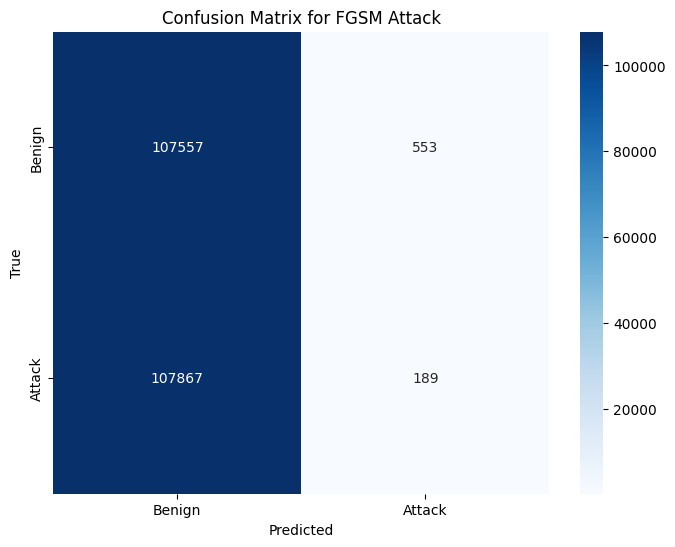

In [ ]:
# Calculate accuracy, precision, recall, and F1-score for the FGSM attack
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

adversarial_accuracy = accuracy_score(y_test, adversarial_predictions)
print(f"Adversarial Accuracy: {adversarial_accuracy}")

adversarial_precision = precision_score(y_test, adversarial_predictions)
print(f"Adversarial Precision: {adversarial_precision}")

adversarial_recall = recall_score(y_test, adversarial_predictions)
print(f"Adversarial Recall: {adversarial_recall}")

adversarial_f1 = f1_score(y_test, adversarial_predictions)
print(f"Adversarial F1 Score: {adversarial_f1}")

# Display the confusion matrix for the FGSM attack
conf_matrix_fgsm = confusion_matrix(y_test, adversarial_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_fgsm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign", "Attack"], yticklabels=["Benign", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for FGSM Attack")
plt.show()

# **JSMA (Jacobian-based Saliency Map Attack)**


This attack uses the Jacobian matrix to create a saliency map. The saliency map is used to determine the features that contribute the most to the prediction and uses that to generate perturbations. A function called “jsma_attack” with six parameters: model, data, label, theta, gamma, and max_iterations was created to generate the perturbations. The theta indicates the degree of perturbation allowed for a particular feature. The higher the theta, the higher the perturbations generated for a feature. The gamma controls the number of features to be created in each iteration, and the max_iterations indicate the maximum of iterations to compute the saliency map. Theta of 0.1 was used for the degree of perturbations, gamma of 0.1 was used to control the size of features selected, and a maximum of 10 iterations was used for this attack. The following shows the performance of the decision tree after the attack.

In [ ]:
def calculate_jacobian(model, data):  #this function calculate the jacobian matrix used in finding the most nfluencial features.
                                        #it creates the matrix using the data

    return np.random.rand(*data.shape)


def jsma_attack(model, data, label, theta, gamma, max_iterations):#this function implements the attack, It takes 6 parameters: model, data, label, theta, gamma and max-iterations.
                                                                        #model stands for the machine learning model to attack. Data stands for the input data. Label stands for the true lable
                                                                        #theta stands for step size for increasing the value of a feature
                                                                        #gamma stands for step size for decreasing the value of a feature
                                                                        #max-iteration stands for the maximum number of times to distort the input feature(s)


    data = np.array(data, dtype=np.float32)    #the data was copied since it will be modified
    modified_data = data.copy()
    current_prediction = model.predict(np.array([modified_data]))[0] #this code uses the decision tree model to make prediction

    for _ in range(max_iterations):   #
        jacobian = calculate_jacobian(model, modified_data) #calculate the jacobian matrix


        saliency_map = np.abs(jacobian)   #calculate the Siliency map by computing the absolute value of the Jacobian Matrix

        #Derive the features to modify by selecting the maximum and minimum values
        value_to_increase = np.unravel_index(np.argmax(saliency_map), saliency_map.shape) #getting the maximum value
        value_to_decrease = np.unravel_index(np.argmin(saliency_map), saliency_map.shape)  #getting the minimum value

        #
        modified_data[value_to_increase] = np.clip(modified_data[value_to_increase] + theta, 0, 1) #add theta to the maximum value
        modified_data[value_to_decrease] = np.clip(modified_data[value_to_decrease] - gamma, 0, 1) #subtract gamma from the minimum value


        new_prediction = model.predict(np.array([modified_data]))[0]  #make new prediction using the modified data


        if new_prediction != current_prediction: #check if the model as been fooled into making wrong prediction
            break

        current_prediction = new_prediction

    return modified_data



theta = 0.1
gamma = 0.1
max_iterations = 10

jsma_adversarial_examples = []
for i in range(len(X_test)):
    jsma_ex = jsma_attack(clf, X_test[i], y_test.iloc[i], theta, gamma, max_iterations)
    jsma_adversarial_examples.append(jsma_ex)

# Evaluate the model on the JSMA adversarial examples
jsma_adversarial_predictions = clf.predict(np.array(jsma_adversarial_examples))

# Calculate accuracy on the JSMA adversarial examples
jsma_adversarial_accuracy = accuracy_score(y_test, jsma_adversarial_predictions)
print(f"JSMA Adversarial Accuracy: {jsma_adversarial_accuracy}")

print("JSMA Adversarial Predictions:", jsma_adversarial_predictions[:20])

JSMA Adversarial Accuracy: 0.5824273937622013
JSMA Adversarial Predictions: [0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0]


JSMA Adversarial Accuracy: 0.5824273937622013
JSMA Adversarial Precision: 0.6839091153424715
JSMA Adversarial Recall: 0.3061375583031021
JSMA Adversarial F1 Score: 0.4229502956688509


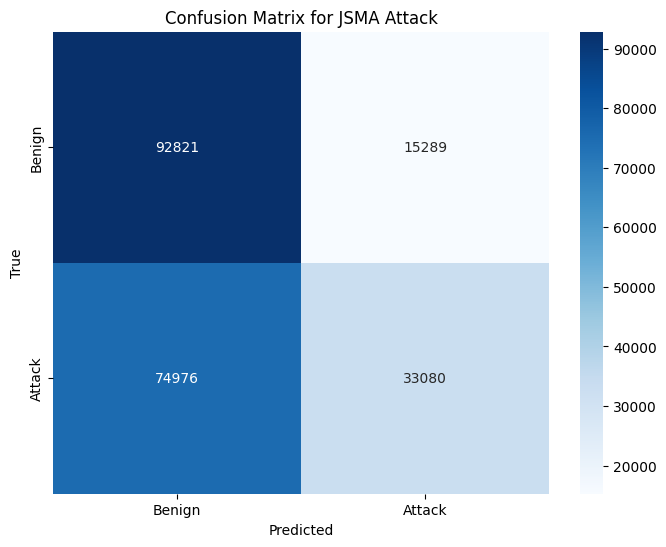

In [ ]:
# Calculate accuracy, precision, recall, and F1-score for the JSMA attack
jsma_adversarial_accuracy = accuracy_score(y_test, jsma_adversarial_predictions)
print(f"JSMA Adversarial Accuracy: {jsma_adversarial_accuracy}")

jsma_adversarial_precision = precision_score(y_test, jsma_adversarial_predictions)
print(f"JSMA Adversarial Precision: {jsma_adversarial_precision}")

jsma_adversarial_recall = recall_score(y_test, jsma_adversarial_predictions)
print(f"JSMA Adversarial Recall: {jsma_adversarial_recall}")

jsma_adversarial_f1 = f1_score(y_test, jsma_adversarial_predictions)
print(f"JSMA Adversarial F1 Score: {jsma_adversarial_f1}")

# Display the confusion matrix for the JSMA attack
conf_matrix_jsma = confusion_matrix(y_test, jsma_adversarial_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_jsma, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign", "Attack"], yticklabels=["Benign", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for JSMA Attack")
plt.show()

# **BIM  Attack**

BIM is an iterative attack that was developed to target neural networks but was adopted to target decision tree models in this project by approximating the gradient of the loss with respect to the input data. Epsilon controls the maximum amount of perturbations applied to input data for each iteration. For this project, an epsilon of 0.1 was used. Alpha, which controls the aggressiveness of the attack, was set to 0.01. The number of iterations for the application of the perturbations on the input data was set to 10. The following shows the performance of the decision tree after the attack.

In [ ]:
#the function below implement the Basic Iterative Method attack. it takes in six parameters: model representing the decision tree model, data representing the input data, label representing the true label
#Epsilon which stands for the degree of perturbations, alpha representing

def bim_attack(model, data, label, epsilon, alpha, iterations):


    data = np.array(data, dtype=np.float32) #the data is put in a proper format for the attack
    perturbed_data = data.copy()  #the data is copied to prevent modification of that actual dataset

    for _ in range(iterations): #this loop will run for a specified number of iterations

        gradient = np.random.uniform(low=-1, high=1, size=data.shape) #this calculates the gradient of input data


        perturbed_data = perturbed_data + alpha * np.sign(gradient) #this adds pertubation to the data by mulpilying the alpha


        perturbed_data = np.clip(perturbed_data, data - epsilon, data + epsilon) # this adds pertubation to the data by subtracting and adding  the epsilon from the original data
                                                                                #and finally the data is clipped to make it possible for training with Ml-model
        perturbed_data = np.clip(perturbed_data, 0, 1)


    return perturbed_data


# Example usage
epsilon = 0.1
alpha = 0.01
iterations = 10

bim_adversarial_examples = []
for i in range(len(X_test)):
    bim_ex = bim_attack(clf, X_test[i], y_test.iloc[i], epsilon, alpha, iterations)
    bim_adversarial_examples.append(bim_ex)


# Evaluate the model on the BIM adversarial examples
bim_adversarial_predictions = clf.predict(np.array(bim_adversarial_examples))

# Calculate accuracy on the BIM adversarial examples
bim_adversarial_accuracy = accuracy_score(y_test, bim_adversarial_predictions)
print(f"BIM Adversarial Accuracy: {bim_adversarial_accuracy}")

print("BIM Adversarial Predictions:", bim_adversarial_predictions[:20])

BIM Adversarial Accuracy: 0.5004996160358243
BIM Adversarial Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


BIM Adversarial Accuracy: 0.5004996160358243
BIM Adversarial Precision: 0.651685393258427
BIM Adversarial Recall: 0.001610276153105797
BIM Adversarial F1 Score: 0.0032126141262705057


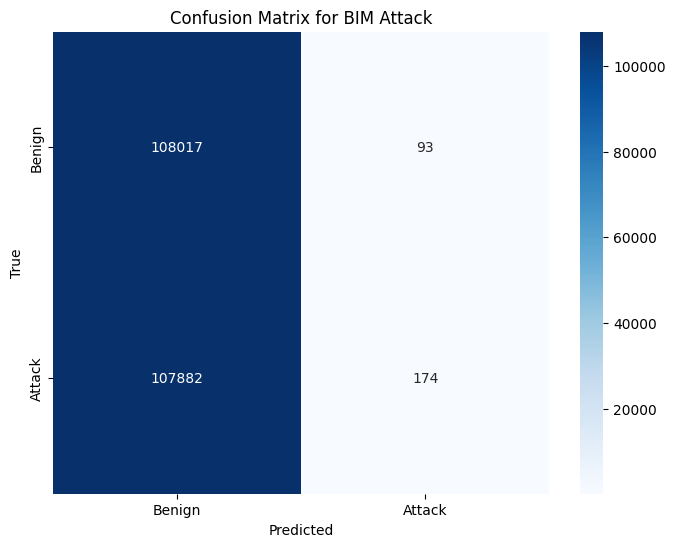

In [ ]:
# Calculate accuracy, precision, recall, and F1-score for the BIM attack
bim_adversarial_accuracy = accuracy_score(y_test, bim_adversarial_predictions)
print(f"BIM Adversarial Accuracy: {bim_adversarial_accuracy}")

bim_adversarial_precision = precision_score(y_test, bim_adversarial_predictions)
print(f"BIM Adversarial Precision: {bim_adversarial_precision}")

bim_adversarial_recall = recall_score(y_test, bim_adversarial_predictions)
print(f"BIM Adversarial Recall: {bim_adversarial_recall}")

bim_adversarial_f1 = f1_score(y_test, bim_adversarial_predictions)
print(f"BIM Adversarial F1 Score: {bim_adversarial_f1}")

# Display the confusion matrix for the BIM attack
conf_matrix_bim = confusion_matrix(y_test, bim_adversarial_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bim, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign", "Attack"], yticklabels=["Benign", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for BIM Attack")
plt.show()

# **Defence Startegy**

The defence strategy adopted for this work is adversarial training using an ensemble classifier. Adversarial training is still the most effective technique for preventing adversarial attacks (Park and So 2020), and using an ensembled classifier provides an extra layer of resistance against adversarial attacks, as different models have different perspectives, and an attacker will not be able to fool all the weaker classifiers present within the ensembled model (Lin et al. 2022). The ensembled model employed for this task is the Adaboost algorithm with decision trees as the base classifiers. 50 different decision tree algorithms were used within the ensembled classifier to train on the adversarial examples. The adversarial examples generated using FGSM, JSMA, and BIM were partitioned into training and test sets. The training set represents the seen attacks, while the testing set represents the unseen attacks. The following shows the performance of the defence strategy in three different attack scenarios.

**Data Preparation**

Peparing Data for Adversarial Defense Using Ensembled Method called Adaboost

In [ ]:

adversarial_examples = np.array(adversarial_examples)

# Create a DataFrame from adversarial examples
adv_df = pd.DataFrame(adversarial_examples)

# Add y_test as a new column to the DataFrame
adv_df['Label'] = y_test.values

# Now adv_df contains both adversarial examples and their corresponding true labels
print(adv_df.head())

          0    1    2        3         4    5    6         7    8    9  \
0  0.000000  0.0  0.0  0.00000  0.000000  1.0  0.0  1.000000  0.0  0.0   
1  0.000000  0.0  0.0  0.00000  0.000000  1.0  0.0  0.276413  0.0  0.0   
2  1.000000  1.0  1.0  1.00000  1.000000  0.0  1.0  0.000000  1.0  1.0   
3  1.000000  1.0  1.0  1.00000  1.000000  0.0  1.0  0.000000  1.0  1.0   
4  0.768288  1.0  1.0  0.86321  0.887351  0.0  1.0  0.000000  1.0  1.0   

         10   11   12   13   14   15   16        17   18  Label  
0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0      0  
1  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  1.000000  0.0      0  
2  1.000000  1.0  1.0  1.0  1.0  1.0  1.0  1.000000  1.0      1  
3  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  1.000000  0.0      1  
4  0.279763  1.0  1.0  1.0  1.0  1.0  0.0  0.938353  1.0      1  


Oversample the Target before adversarial training

In [ ]:
# Separate majority and minority classes in adv_df
adv_df_majority = adv_df[adv_df['Label'] == 0]
adv_df_minority = adv_df[adv_df['Label'] == 1]

# Upsample minority class
adv_df_minority_upsampled = resample(adv_df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(adv_df_majority),    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
adv_df_upsampled = pd.concat([adv_df_majority, adv_df_minority_upsampled])

# Display new class counts
print(adv_df_upsampled['Label'].value_counts())

Label
0    108110
1    108110
Name: count, dtype: int64


Split the adversarial dataset

In [ ]:
# Split the upsampled adversarial data into training and testing sets
X_adv_train, X_adv_test, y_adv_train, y_adv_test = train_test_split(
    adv_df_upsampled.drop('Label', axis=1), adv_df_upsampled['Label'], test_size=0.3, random_state=42
)

print(X_adv_train.shape, X_adv_test.shape, y_adv_train.shape, y_adv_test.shape)

(151354, 19) (64866, 19) (151354,) (64866,)


## **Defence Aganst FGSM Attack**

### **Adversarial Training of Ensembled Classsifer using FGSM Adversarial Examples**

In [ ]:
adaboost_clf = AdaBoostClassifier(DecisionTreeClassifier(random_state=40), n_estimators=50, random_state=42, learning_rate=0.01)
adaboost_clf.fit(X_adv_train, y_adv_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=40),
                   learning_rate=0.01, random_state=42)

## **Evaluating on seen examples**

In [ ]:
# Calculate metrics for adversarial training data
y_adv_pred_train = adaboost_clf.predict(X_adv_train)
accuracy_adv_train = accuracy_score(y_adv_train, y_adv_pred_train)
precision_adv_train = precision_score(y_adv_train, y_adv_pred_train)
recall_adv_train = recall_score(y_adv_train, y_adv_pred_train)
f1_adv_train = f1_score(y_adv_train, y_adv_pred_train)

print(f"Adversarial Train Accuracy: {accuracy_adv_train}")
print(f"Adversarial Train Precision: {precision_adv_train}")
print(f"Adversarial Train Recall: {recall_adv_train}")
print(f"Adversarial Train F1 Score: {f1_adv_train}")

Adversarial Train Accuracy: 0.8532116759385282
Adversarial Train Precision: 0.7728008358257877
Adversarial Train Recall: 0.9995230714200548
Adversarial Train F1 Score: 0.8716603797563413


## **Evaluating on Unseen examples**

In [ ]:
# Predict on adversarial test data
y_adv_pred_test = adaboost_clf.predict(X_adv_test)

# Calculate metrics for adversarial test data
accuracy_adv_test = accuracy_score(y_adv_test, y_adv_pred_test)
precision_adv_test = precision_score(y_adv_test, y_adv_pred_test)
recall_adv_test = recall_score(y_adv_test, y_adv_pred_test)
f1_adv_test = f1_score(y_adv_test, y_adv_pred_test)

print(f"Adversarial Test Accuracy: {accuracy_adv_test}")
print(f"Adversarial Test Precision: {precision_adv_test}")
print(f"Adversarial Test Recall: {recall_adv_test}")
print(f"Adversarial Test F1 Score: {f1_adv_test}")

Adversarial Test Accuracy: 0.8513396848888478
Adversarial Test Precision: 0.7731507891234075
Adversarial Test Recall: 0.9969657032519079
Adversarial Test F1 Score: 0.8709085797667974


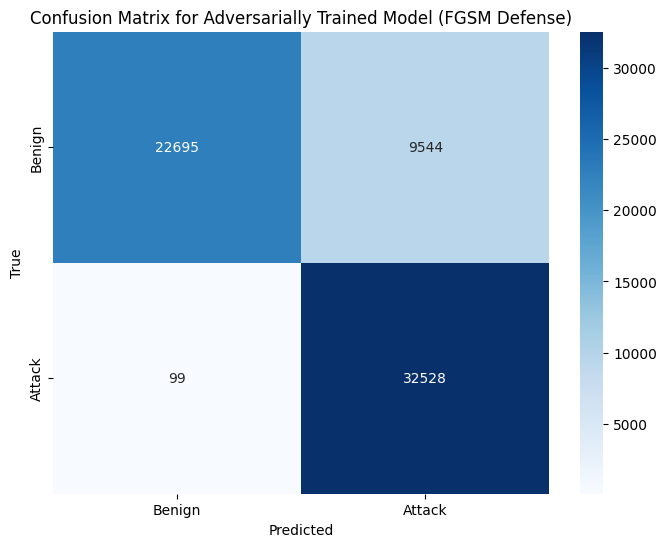

In [ ]:
conf_matrix_adv = confusion_matrix(y_adv_test, y_adv_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_adv, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign", "Attack"], yticklabels=["Benign", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Adversarially Trained Model (FGSM Defense)")
plt.show()

## **Defence Aganst JSMA Attack**

Preparing the data

In [ ]:
# Assuming adversarial_examples from JSMA attack is a list and y_test is available
jsma_adversarial_examples = np.array(jsma_adversarial_examples) #convert to numpy array

# Create a DataFrame from JSMA adversarial examples
jsma_adv_df = pd.DataFrame(jsma_adversarial_examples)

# Add y_test as a new column to the DataFrame
jsma_adv_df['Label'] = y_test.values

# Oversample the JSMA adversarial data
# Separate majority and minority classes
jsma_adv_df_majority = jsma_adv_df[jsma_adv_df['Label'] == 0]
jsma_adv_df_minority = jsma_adv_df[jsma_adv_df['Label'] == 1]

# Upsample minority class
jsma_adv_df_minority_upsampled = resample(jsma_adv_df_minority,
                                          replace=True,
                                          n_samples=len(jsma_adv_df_majority),
                                          random_state=123)

# Combine majority class with upsampled minority class
jsma_adv_df_upsampled = pd.concat([jsma_adv_df_majority, jsma_adv_df_minority_upsampled])

# Split the upsampled JSMA adversarial data
X_jsma_adv_train, X_jsma_adv_test, y_jsma_adv_train, y_jsma_adv_test = train_test_split(
    jsma_adv_df_upsampled.drop('Label', axis=1),
    jsma_adv_df_upsampled['Label'],
    test_size=0.3,
    random_state=42
)

print(X_jsma_adv_train.shape, X_jsma_adv_test.shape, y_jsma_adv_train.shape, y_jsma_adv_test.shape)

(151354, 19) (64866, 19) (151354,) (64866,)


## **Adversarial Training of Ensembled Classsifer using JSMA Adversarial Examples**

In [ ]:
adaboost_clf = AdaBoostClassifier(DecisionTreeClassifier(random_state=40), n_estimators=50, random_state=42, learning_rate=0.01)

adaboost_clf.fit(X_jsma_adv_train, y_jsma_adv_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=40),
                   learning_rate=0.01, random_state=42)

## **Evaluating on Seen Examples**

In [ ]:
# Calculate metrics for adversarial training data
y_adv_pred_train = adaboost_clf.predict(X_jsma_adv_train)
accuracy_adv_train = accuracy_score(y_jsma_adv_train, y_adv_pred_train)
precision_adv_train = precision_score(y_jsma_adv_train, y_adv_pred_train)
recall_adv_train = recall_score(y_jsma_adv_train, y_adv_pred_train)
f1_adv_train = f1_score(y_jsma_adv_train, y_adv_pred_train)

print(f"Adversarial Train Accuracy: {accuracy_adv_train}")
print(f"Adversarial Train Precision: {precision_adv_train}")
print(f"Adversarial Train Recall: {recall_adv_train}")
print(f"Adversarial Train F1 Score: {f1_adv_train}")

Adversarial Train Accuracy: 0.9998678594553166
Adversarial Train Precision: 0.9998013060813585
Adversarial Train Recall: 0.9999337599194521
Adversarial Train F1 Score: 0.9998675286138194


## **Evaluating on Unseen Examples**

In [ ]:
y_jsma_adv_pred_test = adaboost_clf.predict(X_jsma_adv_test)

accuracy_jsma_adv_test = accuracy_score(y_jsma_adv_test, y_jsma_adv_pred_test)
precision_jsma_adv_test = precision_score(y_jsma_adv_test, y_jsma_adv_pred_test)
recall_jsma_adv_test = recall_score(y_jsma_adv_test, y_jsma_adv_pred_test)
f1_jsma_adv_test = f1_score(y_jsma_adv_test, y_jsma_adv_pred_test)

print(f"JSMA Adversarial Test Accuracy: {accuracy_jsma_adv_test}")
print(f"JSMA Adversarial Test Precision: {precision_jsma_adv_test}")
print(f"JSMA Adversarial Test Recall: {recall_jsma_adv_test}")
print(f"JSMA Adversarial Test F1 Score: {f1_jsma_adv_test}")

JSMA Adversarial Test Accuracy: 0.9891776893904357
JSMA Adversarial Test Precision: 0.9872111833470684
JSMA Adversarial Test Recall: 0.991326202225151
JSMA Adversarial Test F1 Score: 0.9892644135188867


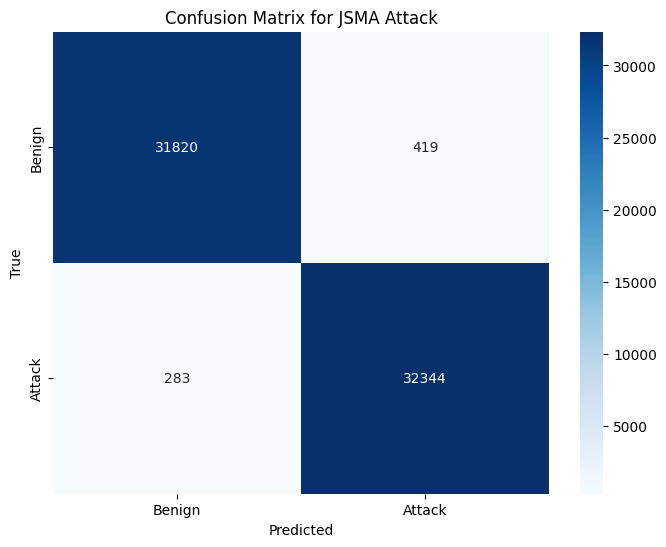

In [ ]:
# Display the confusion matrix for the JSMA attack
conf_matrix_jsma = confusion_matrix(y_jsma_adv_test, y_jsma_adv_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_jsma, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign", "Attack"], yticklabels=["Benign", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for JSMA Attack")
plt.show()

# **Defense Against BIM Attack**

# **Data Preparation, Model Training and Evaluating Performance on seen perturbations ***

In [ ]:
bim_adversarial_examples = np.array(bim_adversarial_examples)
bim_adv_df = pd.DataFrame(bim_adversarial_examples)
bim_adv_df['Label'] = y_test.values

# Separate majority and minority classes
bim_adv_df_majority = bim_adv_df[bim_adv_df['Label'] == 0]
bim_adv_df_minority = bim_adv_df[bim_adv_df['Label'] == 1]

# Upsample minority class
bim_adv_df_minority_upsampled = resample(bim_adv_df_minority,
                                          replace=True,
                                          n_samples=len(bim_adv_df_majority),
                                          random_state=123)

# Combine majority class with upsampled minority class
bim_adv_df_upsampled = pd.concat([bim_adv_df_majority, bim_adv_df_minority_upsampled])

# Split the upsampled BIM adversarial data
X_bim_adv_train, X_bim_adv_test, y_bim_adv_train, y_bim_adv_test = train_test_split(
    bim_adv_df_upsampled.drop('Label', axis=1),
    bim_adv_df_upsampled['Label'],
    test_size=0.3,
    random_state=42
)

print(X_bim_adv_train.shape, X_bim_adv_test.shape, y_bim_adv_train.shape, y_bim_adv_test.shape)

adaboost_clf = AdaBoostClassifier(DecisionTreeClassifier(random_state=40), n_estimators=50, random_state=42, learning_rate=0.01) # Adjust parameters as needed

adaboost_clf.fit(X_bim_adv_train, y_bim_adv_train)

# Calculate metrics for adversarial training data
y_adv_pred_train = adaboost_clf.predict(X_bim_adv_train)
accuracy_adv_train = accuracy_score(y_bim_adv_train, y_adv_pred_train)
precision_adv_train = precision_score(y_bim_adv_train, y_adv_pred_train)
recall_adv_train = recall_score(y_bim_adv_train, y_adv_pred_train)
f1_adv_train = f1_score(y_bim_adv_train, y_adv_pred_train)

print(f"Adversarial Train Accuracy: {accuracy_adv_train}")
print(f"Adversarial Train Precision: {precision_adv_train}")
print(f"Adversarial Train Recall: {recall_adv_train}")
print(f"Adversarial Train F1 Score: {f1_adv_train}")

(151354, 19) (64866, 19) (151354,) (64866,)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Adversarial Train Accuracy: 0.8505556509903934
Adversarial Train Precision: 0.7716211772443275
Adversarial Train Recall: 0.9947670336367129
Adversarial Train F1 Score: 0.869099221620996


## **Evaluating Performance on unseen perturbations**

In [ ]:
# Predict on adversarial test data
y_bim_adv_pred_test = adaboost_clf.predict(X_bim_adv_test)

# Calculate metrics for adversarial test data
accuracy_bim_adv_test = accuracy_score(y_bim_adv_test, y_bim_adv_pred_test)
precision_bim_adv_test = precision_score(y_bim_adv_test, y_bim_adv_pred_test)
recall_bim_adv_test = recall_score(y_bim_adv_test, y_bim_adv_pred_test)
f1_bim_adv_test = f1_score(y_bim_adv_test, y_bim_adv_pred_test)

print(f"Adversarial Test Accuracy: {accuracy_bim_adv_test}")
print(f"Adversarial Test Precision: {precision_bim_adv_test}")
print(f"Adversarial Test Recall: {recall_bim_adv_test}")
print(f"Adversarial Test F1 Score: {f1_bim_adv_test}")

Adversarial Test Accuracy: 0.8488576449912126
Adversarial Test Precision: 0.772019737312579
Adversarial Test Recall: 0.9926441290955343
Adversarial Test F1 Score: 0.868540320201668


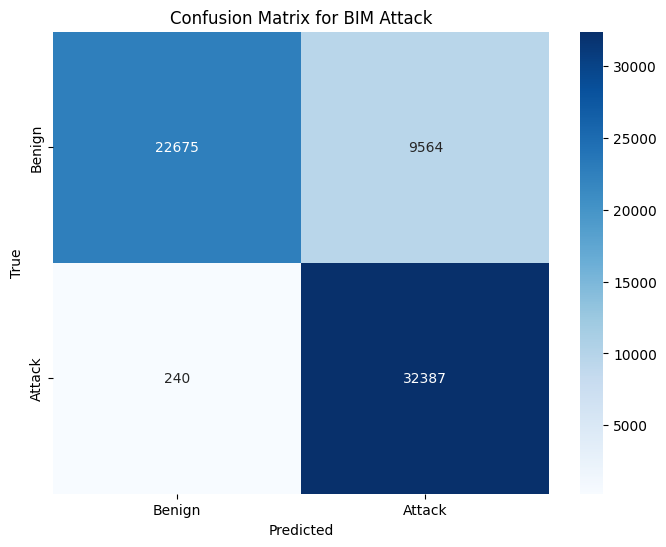

In [ ]:
# Display the confusion matrix for the BIM attack
conf_matrix_bim = confusion_matrix(y_bim_adv_test, y_bim_adv_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bim, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign", "Attack"], yticklabels=["Benign", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for BIM Attack")
plt.show()